## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
# from impedance.models.circuits import CustomCircuit
# from impedance.visualization import plot_nyquist # Kept if you want to switch plotting methods

## Data imports

In [244]:
# --- Data Loading ---

def EIS_z60_import(filename):
    """ Import z60 file as pandas dataframe."""
    df = pd.read_csv(
        filename,
        skiprows=11,
        sep='\s+',
        header=None,
        names=["Freq", "Ampl", "Bias", "Time", "Z'", "Z''", "GD", "Err", "Range"],
        index_col="Freq")

    df = df.drop(columns=['Ampl', 'Bias', 'Time', 'GD', 'Err', 'Range']) # Drop columns
    mask = (df["Z'"] > 0) & (df["Z''"] < 0) # Only keep first quadrant in Nyquist plot

    df['Z'] = np.sqrt( (df["Z'"].to_numpy())**2 + \
                       (df["Z'"].to_numpy())**2 )

    df['theta'] = np.arctan2(-df["Z'"].to_numpy(), df["Z''"].to_numpy()) * 180 / np.pi
    
    df[~mask] = None
    return df
    
try:
    HS_EIS_10mV_1_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_10mV_2.z60")
    HS_EIS_10mV_2_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_10mV_3.z60")
    HS_EIS_10mV_3_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_10mV_4.z60")

    HS_EIS_20mV_1_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_20mV_2.z60")
    HS_EIS_20mV_2_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_20mV_3.z60")
    HS_EIS_20mV_3_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_20mV_4.z60")    

    HS_EIS_30mV_1_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_30mV_3.z60")
    HS_EIS_30mV_2_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_30mV_3.z60")
    HS_EIS_30mV_3_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_30mV_5.z60")

    
    CS_EIS_10mV_1_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_10mV_4.z60")
    CS_EIS_10mV_2_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_10mV_5.z60")
    CS_EIS_10mV_3_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_10mV_6.z60")
    
    CS_EIS_20mV_1_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_20mV_4.z60")
    CS_EIS_20mV_2_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_20mV_5.z60")
    CS_EIS_20mV_3_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_20mV_6.z60")
    
    CS_EIS_30mV_1_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_30mV_4.z60")
    CS_EIS_30mV_2_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_30mV_5.z60")
    CS_EIS_30mV_3_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_30mV_6.z60")
        
except FileNotFoundError as e:
    print(f"Error: File was not found.")
    print(e.message)
    print(e.args)
    exit()
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

#CS_EIS_10mV_1_df

In [245]:
HS_EIS_20mV_2_df 

Z'       Z''              Z       theta
Freq                                                        
100000.000000       NaN       NaN            NaN         NaN
89038.900000        NaN       NaN            NaN         NaN
79279.300000        NaN       NaN            NaN         NaN
70589.400000        NaN       NaN            NaN         NaN
62852.000000        NaN       NaN            NaN         NaN
...                 ...       ...            ...         ...
0.147548       248470.0 -368151.0  351389.643843 -145.984063
0.131375       295073.0 -378262.0  417296.238490 -142.043072
0.116975       325722.0 -397505.0  460640.469963 -140.668257
0.104153       330906.0 -414913.0  467971.753071 -141.426552
0.100000       344939.0 -432463.0  487817.411991 -141.423610

[120 rows x 4 columns]

## Calculating average and standard deviation

In [254]:
# Calculating average and standard deviation 

CS_df_10mV_concat = pd.concat([CS_EIS_10mV_1_df, CS_EIS_10mV_2_df, CS_EIS_10mV_3_df])
CS_df_10mV_means = CS_df_10mV_concat.groupby(CS_df_10mV_concat.index).mean()
CS_df_10mV_err = CS_df_10mV_concat.groupby(CS_df_10mV_concat.index).std()

HS_df_10mV_concat = pd.concat([HS_EIS_10mV_1_df, HS_EIS_10mV_2_df, HS_EIS_10mV_3_df])
HS_df_10mV_means = HS_df_10mV_concat.groupby(HS_df_10mV_concat.index).mean()
HS_df_10mV_err = HS_df_10mV_concat.groupby(HS_df_10mV_concat.index).std()

CS_df_20mV_concat = pd.concat([CS_EIS_20mV_1_df, CS_EIS_20mV_2_df, CS_EIS_20mV_3_df])
CS_df_20mV_means = CS_df_20mV_concat.groupby(CS_df_20mV_concat.index).mean()
CS_df_20mV_err = CS_df_20mV_concat.groupby(CS_df_20mV_concat.index).std()

HS_df_20mV_concat = pd.concat([HS_EIS_20mV_1_df, HS_EIS_20mV_2_df, HS_EIS_20mV_3_df])
HS_df_20mV_means = HS_df_20mV_concat.groupby(HS_df_20mV_concat.index).mean()
HS_df_20mV_err = HS_df_20mV_concat.groupby(HS_df_20mV_concat.index).std()

CS_df_30mV_concat = pd.concat([CS_EIS_30mV_1_df, CS_EIS_30mV_2_df, CS_EIS_30mV_3_df])
CS_df_30mV_means = CS_df_30mV_concat.groupby(CS_df_30mV_concat.index).mean()
CS_df_30mV_err = CS_df_30mV_concat.groupby(CS_df_30mV_concat.index).std()

HS_df_30mV_concat = pd.concat([HS_EIS_30mV_1_df, HS_EIS_30mV_2_df, HS_EIS_30mV_3_df])
HS_df_30mV_means = HS_df_30mV_concat.groupby(HS_df_30mV_concat.index).mean()
HS_df_30mV_err = HS_df_30mV_concat.groupby(HS_df_30mV_concat.index).std()

In [257]:
HS_df_30mV_err

Z'            Z''              Z     theta
Freq                                                                
0.100000       190442.450394  213949.959424  269326.296198  1.470589
0.103060                 NaN            NaN            NaN       NaN
0.104153            0.000000       0.000000       0.000000  0.000000
0.115770                 NaN            NaN            NaN       NaN
0.116975            0.000000       0.000000       0.000000  0.000000
...                      ...            ...            ...       ...
62852.000000             NaN            NaN            NaN       NaN
70589.400000             NaN            NaN            NaN       NaN
79279.300000             NaN            NaN            NaN       NaN
89038.900000             NaN            NaN            NaN       NaN
100000.000000            NaN            NaN            NaN       NaN

[218 rows x 4 columns]

## Plotting average data in Bode Plot

In [258]:
print(f"Theta mean error 10mV {CS_df_10mV_err['theta'].mean()}%")
print(f"|Z| mean error 10mV {CS_df_10mV_err['Z'].mean()}%")

print(f"Theta mean error 20mV {CS_df_20mV_err['theta'].mean()}%")
print(f"|Z| mean error 20mV {CS_df_20mV_err['Z'].mean()}%")

print(f"Theta mean error 30mV {CS_df_30mV_err['theta'].mean()}%")
print(f"|Z| mean error 30mV {CS_df_30mV_err['Z'].mean()}%")

Theta mean error 10mV 3.5704617636521854%
|Z| mean error 10mV 2181.6842491538905%
Theta mean error 20mV 2.5296844504056%
|Z| mean error 20mV 1125.8577821194306%
Theta mean error 30mV 2.1271364919432707%
|Z| mean error 30mV 968.8399346542678%


Clearly, the phase shift error is far higher than the gain, but it would be a mistake to say that gain is less reliable than the phase shift. The error with the gain, likely due to noise at low frequencies, appears more reasonable when the data is plotted on a log axis.


[]

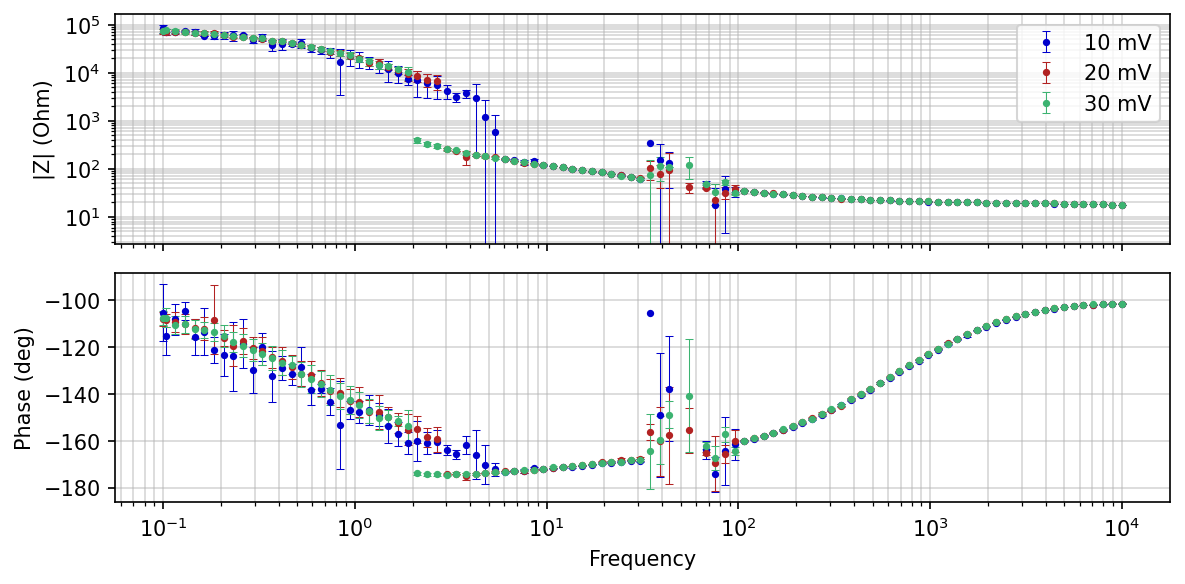

In [259]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,4), sharex=True, dpi=150)

ax1.errorbar(CS_df_10mV_means.index.to_numpy(), CS_df_10mV_means["Z"].to_numpy(), CS_df_10mV_err["Z"].to_numpy(),
             fmt = '.', color='mediumblue', markersize=5, 
             ecolor="mediumblue", elinewidth=0.50, capsize=2, capthick=0.50,
             label="10 mV")
ax1.errorbar(CS_df_20mV_means.index.to_numpy(), CS_df_20mV_means["Z"].to_numpy(), CS_df_20mV_err["Z"].to_numpy(),
             fmt = '.', color='firebrick', markersize=5, 
             ecolor="firebrick", elinewidth=0.50, capsize=2, capthick=0.50,
             label="20 mV")
ax1.errorbar(CS_df_30mV_means.index.to_numpy(), CS_df_30mV_means["Z"].to_numpy(), CS_df_30mV_err["Z"].to_numpy(),
             fmt = '.', color='mediumseagreen', markersize=5, 
             ecolor="mediumseagreen", elinewidth=0.50, capsize=2, capthick=0.50,
             label="30 mV")

ax2.errorbar(CS_df_10mV_means.index.to_numpy(), CS_df_10mV_means["theta"].to_numpy(), CS_df_10mV_err["theta"].to_numpy(),
             fmt = '.', color='mediumblue', markersize=5, 
             ecolor="mediumblue", elinewidth=0.50, capsize=2, capthick=0.50,
             label="10 mV")
ax2.errorbar(CS_df_20mV_means.index.to_numpy(), CS_df_20mV_means["theta"].to_numpy(), CS_df_20mV_err["theta"].to_numpy(),
             fmt = '.', color='firebrick', markersize=5, 
             ecolor="firebrick", elinewidth=0.50, capsize=2, capthick=0.50,
             label="20 mV")
ax2.errorbar(CS_df_30mV_means.index.to_numpy(), CS_df_30mV_means["theta"].to_numpy(), CS_df_30mV_err["theta"].to_numpy(),
             fmt = '.', color='mediumseagreen', markersize=5, 
             ecolor="mediumseagreen", elinewidth=0.50, capsize=2, capthick=0.50,
             label="30 mV")

ax1.grid(True, which="both", ls="-", alpha=0.5)
ax2.grid(True, which="both", ls="-", alpha=0.5)
ax1.legend()

#ax2.xaxis.set_major_locator(plt.MaxNLocator(11))
ax1.set_ylabel('|Z| (Ohm)')
ax2.set_ylabel('Phase (deg)')
ax2.set_xlabel("Frequency")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax2.set_xscale("log")

plt.tight_layout()
plt.plot()

Okay, the errors with the impedence shift clearly show that:

    20mV is less reliable than 10mV at high frequencies, likely due to non-linearity,
    20mV is more reliable than 10 mV at low frequencies, or atleast, lower frequencies than 10mV

Makes me think that I need to use higher excitation voltages at low frequencies, although I've only seen 10mV and 20mV in research. this paper does 30mV! https://www.mdpi.com/2076-3417/14/13/5754

Then again, I've never seen errorbars on a Bode plot in a research paper

Source of discontinuities: https://www.gamry.com/Framework%20Help/HTML5%20-%20Tripane%20-%20Audience%20A/Content/UT/Discontinuities%20in%20CS_EIS%20Spectra.htm


## Plotting average data on Nyquist plot

So let's have a look at how the Nyquist plot looks, with and without the sketchy data
So we'll remove everything below 10 Hz, plus remove the weird region at 50Hz

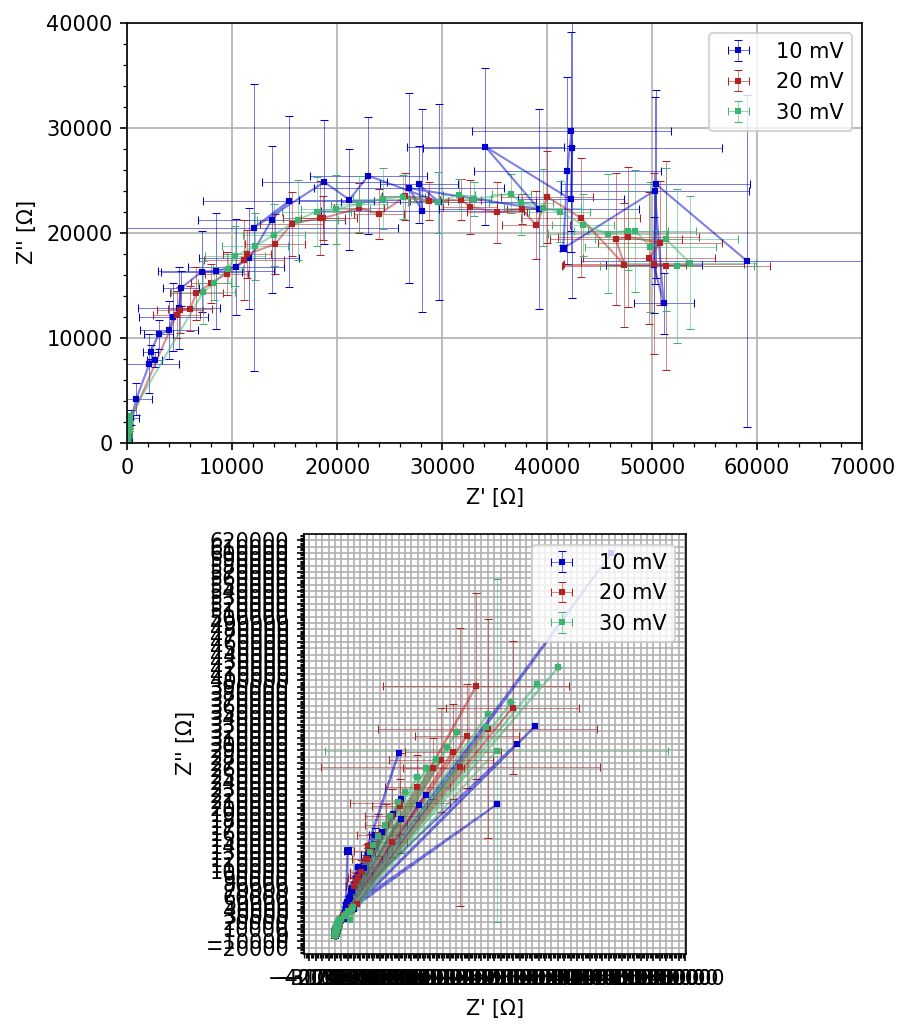

In [262]:
# Nyquist Plot

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, (ax, bx) = plt.subplots(2, 1, figsize=(7, 7), dpi=150)

    # ######## #
    # ax stuff #
    # ######## #    
    mask =  ((CS_df_10mV_means.index > 30) | (CS_df_10mV_means.index < 100))  # Only keep those frequencies above 10 Hz
    ax.errorbar(x=(CS_df_10mV_means[mask])["Z'"].to_numpy(), y=(-CS_df_10mV_means[mask])["Z''"].to_numpy(), 
            xerr=(CS_df_10mV_err[mask])["Z"].to_numpy(), yerr=(CS_df_10mV_err[mask])["Z"].to_numpy(),             
            color='mediumblue', markersize=2, fmt = 's',  
            ecolor="mediumblue", elinewidth=0.250, capsize=2, capthick=0.50,
            label="10 mV")
    ax.errorbar(x=(CS_df_20mV_means[mask])["Z'"].to_numpy(), y=(-CS_df_20mV_means[mask])["Z''"].to_numpy(), 
            xerr=(CS_df_20mV_err[mask])["Z"].to_numpy(), yerr=(CS_df_20mV_err[mask])["Z"].to_numpy(),             
            color='firebrick', markersize=2, fmt = 's', 
            ecolor="firebrick", elinewidth=0.250, capsize=2, capthick=0.50,
            label="20 mV")
    ax.errorbar(x=(CS_df_30mV_means[mask])["Z'"].to_numpy(), y=(-CS_df_30mV_means[mask])["Z''"].to_numpy(), 
            xerr=(CS_df_30mV_err[mask])["Z"].to_numpy(), yerr=(CS_df_30mV_err[mask])["Z"].to_numpy(),             
            color='mediumseagreen', markersize=2, fmt = 's',  
            ecolor="mediumseagreen", elinewidth=0.250, capsize=2, capthick=0.50,
            label="30 mV")    

    ax.plot((CS_df_10mV_means[mask])["Z'"].to_numpy(), (-CS_df_10mV_means[mask])["Z''"].to_numpy(), 's-',
            linewidth=1, alpha=0.5, color='mediumblue', markersize=2)
    ax.plot((CS_df_20mV_means[mask])["Z'"].to_numpy(), (-CS_df_20mV_means[mask])["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='firebrick', markersize=2)
    ax.plot((CS_df_30mV_means[mask])["Z'"].to_numpy(), (-CS_df_30mV_means[mask])["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='mediumseagreen', markersize=2)

    # ######## #
    # bx stuff #
    # ######## #

    bx.errorbar(x=(HS_df_10mV_means)["Z'"].to_numpy(), y=(-HS_df_10mV_means)["Z''"].to_numpy(), 
            xerr=(HS_df_10mV_err)["Z"].to_numpy(), yerr=(HS_df_10mV_err)["Z"].to_numpy(),             
            color='mediumblue', markersize=2, fmt = 's',  
            ecolor="mediumblue", elinewidth=0.250, capsize=2, capthick=0.50,
            label="10 mV")
    bx.errorbar(x=(HS_df_20mV_means)["Z'"].to_numpy(), y=(-HS_df_20mV_means)["Z''"].to_numpy(), 
            xerr=(HS_df_20mV_err)["Z"].to_numpy(), yerr=(HS_df_20mV_err)["Z"].to_numpy(),             
            color='firebrick', markersize=2, fmt = 's', 
            ecolor="firebrick", elinewidth=0.250, capsize=2, capthick=0.50,
            label="20 mV")
    bx.errorbar(x=(HS_df_30mV_means)["Z'"].to_numpy(), y=(-HS_df_30mV_means)["Z''"].to_numpy(), 
            xerr=(HS_df_30mV_err)["Z"].to_numpy(), yerr=(HS_df_30mV_err)["Z"].to_numpy(),             
            color='mediumseagreen', markersize=2, fmt = 's',  
            ecolor="mediumseagreen", elinewidth=0.250, capsize=2, capthick=0.50,
            label="30 mV")    
    
    bx.plot((HS_df_10mV_means)["Z'"].to_numpy(), (-HS_df_10mV_means)["Z''"].to_numpy(), 's-',
            linewidth=1, alpha=0.5, color='mediumblue', markersize=2)
    bx.plot((HS_df_20mV_means)["Z'"].to_numpy(), (-HS_df_20mV_means)["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='firebrick', markersize=2)
    bx.plot((HS_df_30mV_means)["Z'"].to_numpy(), (-HS_df_30mV_means)["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='mediumseagreen', markersize=2)

    # ############## #
    # Graphics stuff #
    # ############## #    
    
    ax.set_xlabel(r"Z' $[\Omega]$")
    ax.set_ylabel(r"Z'' $[\Omega]$")
    ax.legend(loc='upper right')
    bx.set_xlabel(r"Z' $[\Omega]$")
    bx.set_ylabel(r"Z'' $[\Omega]$")
    bx.legend(loc='upper right')

    # Set minor locator for the x-axis with an interval of 0.5
    ax.grid(True)
    ax.xaxis.set_major_locator(tck.MultipleLocator(10000))
    ax.yaxis.set_major_locator(tck.MultipleLocator(10000))
    bx.grid(True)
    bx.xaxis.set_major_locator(tck.MultipleLocator(10000))
    bx.yaxis.set_major_locator(tck.MultipleLocator(10000))
    
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.axes.set_aspect('equal')
    bx.xaxis.set_minor_locator(tck.AutoMinorLocator())
    bx.yaxis.set_minor_locator(tck.AutoMinorLocator())
    bx.axes.set_aspect('equal')
   
    ax.set_xlim(left=0, right=70000)
    ax.set_ylim(bottom=0, top=40000)
    #bx.set_xlim(left=0, right=70000)
    #bx.set_ylim(bottom=0, top=40000)


plt.tight_layout()
plt.show()

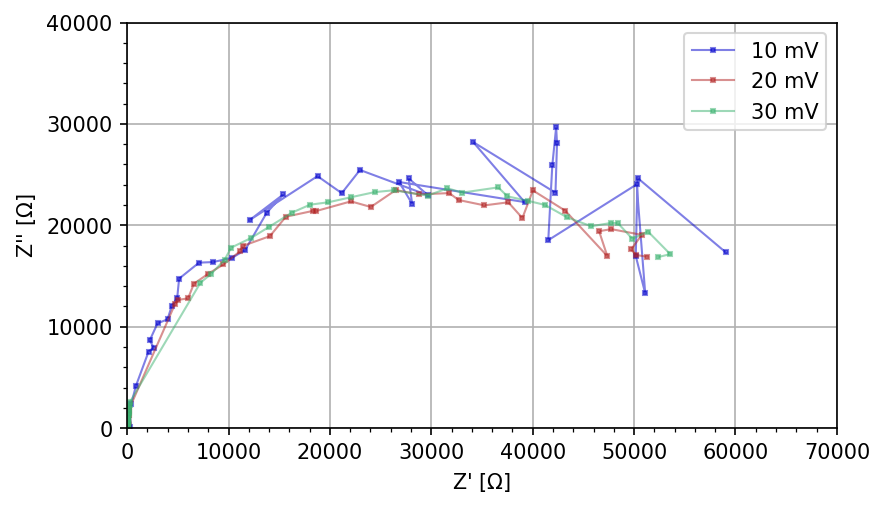

In [251]:
# Nyquist Plot

import matplotlib.ticker as tck
import matplotlib.pyplot as plt

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots(figsize=(6, 3.5), dpi=150)

    mask =  ((CS_df_10mV_means.index > 30) | (CS_df_10mV_means.index < 100))  # Only keep those frequencies above 10 Hz

    ax.plot((CS_df_10mV_means[mask])["Z'"].to_numpy(), (-CS_df_10mV_means[mask])["Z''"].to_numpy(), 's-',
            linewidth=1, alpha=0.5, color='mediumblue', markersize=2,
            label="10 mV")
    ax.plot((CS_df_20mV_means[mask])["Z'"].to_numpy(), (-CS_df_20mV_means[mask])["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='firebrick', markersize=2,
            label="20 mV")
    ax.plot((CS_df_30mV_means[mask])["Z'"].to_numpy(), (-CS_df_30mV_means[mask])["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='mediumseagreen', markersize=2,
            label="30 mV")
    
    ax.set_xlabel(r"Z' $[\Omega]$")
    ax.set_ylabel(r"Z'' $[\Omega]$")
    ax.legend(loc='upper right')

    # Set minor locator for the x-axis with an interval of 0.5
    ax.grid(True)
    ax.xaxis.set_major_locator(tck.MultipleLocator(10000))
    ax.yaxis.set_major_locator(tck.MultipleLocator(10000))
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.axes.set_aspect('equal')

    
    ax.set_xlim(left=0, right=70000)
    ax.set_ylim(bottom=0, top=40000)
    #ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

## Curve fitting


Fitting is performed by non-linear least squares regression of circuit model to impedence data via the scipy.optimize.curve_fit function.

The objective function is:
$$ \chi^2 = \sum_{n=0}^{N} [Z^\prime_{exp}(\omega_n) - Z^\prime_{fit}(\omega_n)]^2 +
               [Z^{\prime\prime}_{exp}(\omega_n) - Z^{\prime\prime}_{fit}(\omega_n)]^2 $$


               


| Circuit Element | Impedence                                    |
| --------------- | -------------------------------------------- | 
| Resistor        | $$ Z = R $$                                  |
| Capacitor       | $$ Z = \frac{1}{C \cdot j 2 \pi f} $$        |
| Inductor        | $$Z = L \cdot j 2 \pi f $$                   |
| CPE             | $$Z = \frac{1}{Q \cdot (j 2 \pi f)^\alpha}$$ |

| Impedences in parallel | Impedences in series |
| --------------- | -------------------------------------------- | 
| $$ Z_{parallel} = \frac{1}{\frac{1}{Z_1} + \frac{1}{Z_2} + ... + \frac{1}{Z_n}}$$ | $$ Z_{series} = Z_1 + Z_2 + ... + Z_n $$

In [97]:
import functools
import numpy as np

def R(f, R): return np.zeros(len(f)) + (R + 0 * 1j)
def C(f, C): return 1.0 / (C * 1j * (2 * np.pi * np.array(f)) )
def L(f, L): return L * 1j * (2 * np.pi * np.array(f))
def CPE(f, Q, alpha): return 1.0 / (Q * (1j * (2 * np.pi * np.array(f))) ** alpha)

def s(*args): return functools.reduce(np.add, [*args])
def p(*args): return np.reciprocal(functools.reduce(np.add, np.reciprocal([*args])))

f = np.linspace(1e5,1e-2,70)

# Some common-sense tests to make sure the code is correct
assert (s(R(f, 10),R(f, 10)) == R(f, 20)).all()
assert (p(R(f, 10),R(f, 10)) == R(f, 5)).all()
assert (s(C(f, 10),C(f, 10)) == C(f, 5)).all()
assert (p(C(f, 10),C(f, 10)) == C(f, 20)).all()


In [98]:
def randles_circuit(f, Rs, Rp, Q, alpha): 
    return s(R(f, Rs), p(R(f, Rp), CPE(f, Q, alpha)))

def model_func(f, Rs, Rp, Q, alpha):
    Z_fit = randles_circuit(f, Rs, Rp, Q, alpha)
    return np.concatenate([Z_fit.real,Z_fit.imag])    


In [127]:
print("Starting curve_fit for real data...")
try:
    popt, pcov = scipy.optimize.curve_fit( 
        f = model_func,     
        xdata = (CS_df_20mV_means[mask])["Z'"].dropna().index,
        ydata = np.concatenate([(CS_df_20mV_means[mask])["Z'"].dropna().to_numpy(),
                                (CS_df_20mV_means[mask])["Z''"].dropna().to_numpy()]),
        #sigma = np.concatenate([(CS_df_20mV_err[mask])["Z'"].dropna().to_numpy(),
        #                        (CS_df_20mV_err[mask])["Z''"].dropna().to_numpy()]),      
        #absolute_sigma=False,
        p0=     [10.0, 7e5,  1e-6, 0.87],  # Initial guesses for the parameters (R_s, R_ct, Q, alpha)
        bounds=([0,    0,    1e-9, 0], 
                [1000, 1e15,  1e-2, 1]), # Helps to keep parameters within physically realistic ranges. 
        maxfev=5000000) # Max number of function evaluations

except RuntimeError:
    print("Curve fitting failed. Could not find optimal parameters.")
    print("Try adjusting initial guesses, bounds, or the model itself.")
except ValueError as e:
    print(f"An error occurred: {e}") 
else:
    print("curve_fit finished successfully!")

    # Results
    perr = np.sqrt(np.diag(pcov))
    print("\nOptimized Parameters:")
    for name, val, err in zip(["Rs", "Rp", "Q", "alpha"], popt, perr):
        print(f"{name:<8}: {val:.2e} ± {err:.2e} ( ± {100*(err/val):.2e} % )")

freq_data = (CS_df_20mV_means[mask])["Z'"].dropna().index    
Z_fit = randles_circuit((CS_df_20mV_means[mask])["Z'"].dropna().index, *popt)

Starting curve_fit for real data...
curve_fit finished successfully!

Optimized Parameters:
Rs      : 2.93e+01 ± 2.02e+02 ( ± 6.90e+02 % )
Rp      : 5.82e+04 ± 9.77e+02 ( ± 1.68e+00 % )
Q       : 7.20e-06 ± 1.60e-07 ( ± 2.22e+00 % )
alpha   : 8.86e-01 ± 1.31e-02 ( ± 1.47e+00 % )


Optimized Parameters: 

|        | 10 mV                                | 20mV                                  | 30mV                                 |
|--------|--------------------------------------|---------------------------------------|--------------------------------------|
|Rs      | 7.22e-16 ± 2.31e+02 ( ± 3.21e+19 % ) | 2.93e+01 ± 2.02e+02 ( ± 690  % )      | 1.65e+02 ± 2.44e+02 ( ± 147  % )     |
|Rp      | 6.42e+04 ± 1.29e+03 ( ± 2.01 % )     | 5.82e+04 ± 9.77e+02 ( ± 1.68 % )      | 5.83e+04 ± 1.15e+03 ( ± 1.97 % )     |
|Q       | 7.79e-06 ± 1.82e-07 ( ± 2.34 % )     | 7.20e-06 ± 1.60e-07 ( ± 2.22 % )      | 7.16e-06 ± 1.85e-07 ( ± 2.58 % )     |
|alpha   | 8.58e-01 ± 1.44e-02 ( ± 1.68 % )     | 8.86e-01 ± 1.31e-02 ( ± 1.47 % )      | 9.11e-01 ± 1.56e-02 ( ± 1.72 % )     |


Oddly enough, the 20mV is the one that shows the least standard deviation error! 
I would have sworn that it was the 30mV from a visual analysis, although not by much.
The 20mV is only slightly better, but still. I am indeed ignoring Rs as important. Cool!

## Showing fitted curve with experimental data

In [183]:
np.logspace(-1,4,num=100,endpoint=True)

array([1.00000000e-01, 1.12332403e-01, 1.26185688e-01, 1.41747416e-01,
       1.59228279e-01, 1.78864953e-01, 2.00923300e-01, 2.25701972e-01,
       2.53536449e-01, 2.84803587e-01, 3.19926714e-01, 3.59381366e-01,
       4.03701726e-01, 4.53487851e-01, 5.09413801e-01, 5.72236766e-01,
       6.42807312e-01, 7.22080902e-01, 8.11130831e-01, 9.11162756e-01,
       1.02353102e+00, 1.14975700e+00, 1.29154967e+00, 1.45082878e+00,
       1.62975083e+00, 1.83073828e+00, 2.05651231e+00, 2.31012970e+00,
       2.59502421e+00, 2.91505306e+00, 3.27454916e+00, 3.67837977e+00,
       4.13201240e+00, 4.64158883e+00, 5.21400829e+00, 5.85702082e+00,
       6.57933225e+00, 7.39072203e+00, 8.30217568e+00, 9.32603347e+00,
       1.04761575e+01, 1.17681195e+01, 1.32194115e+01, 1.48496826e+01,
       1.66810054e+01, 1.87381742e+01, 2.10490414e+01, 2.36448941e+01,
       2.65608778e+01, 2.98364724e+01, 3.35160265e+01, 3.76493581e+01,
       4.22924287e+01, 4.75081016e+01, 5.33669923e+01, 5.99484250e+01,
      

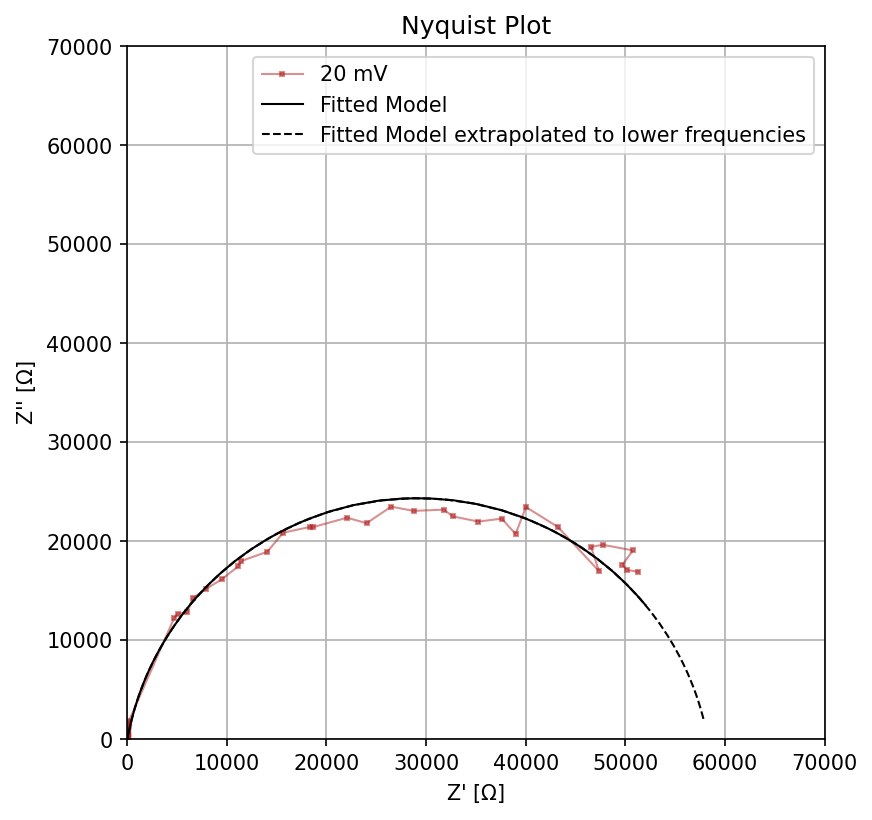

In [191]:
# Nyquist Plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
ax.plot((CS_df_20mV_means[mask])["Z'"].to_numpy(), (-CS_df_20mV_means[mask])["Z''"].to_numpy(), 's-', 
        linewidth=1, alpha=0.5, color='firebrick', markersize=2,
        label="20 mV")

Z_fit = randles_circuit(np.logspace(-1,4,num=100,endpoint=True), *popt)
ax.plot(Z_fit.real, -Z_fit.imag, 'k-', linewidth=1, label='Fitted Model')

Z_fit = randles_circuit(np.logspace(-2,4,num=100,endpoint=True), *popt)
ax.plot(Z_fit.real, -Z_fit.imag, 'k--', linewidth=1, label='Fitted Model extrapolated to lower frequencies')

ax.set_xlabel(r"Z' $[\Omega]$")
ax.set_ylabel(r"Z'' $[\Omega]$")
ax.set_title('Nyquist Plot')
ax.legend(loc='upper right')

ax.grid(True)
ax.set_xlim(left=0, right=70000)
ax.set_ylim(bottom=0, top=70000)
plt.show()

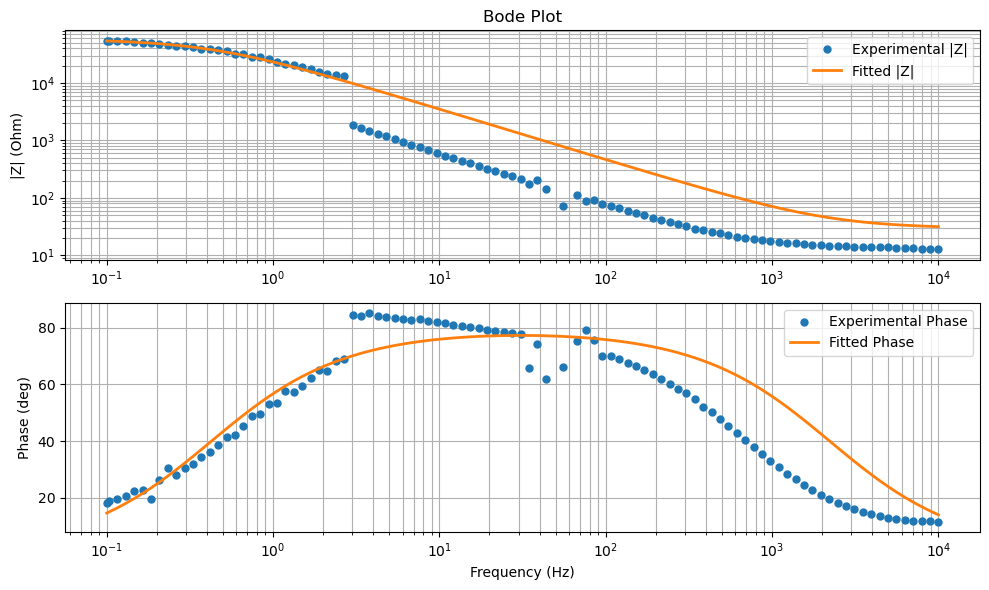

In [129]:
# Bode Plots
plt.figure(figsize=(10, 6))
    
# Magnitude
ax1 = plt.subplot(2, 1, 1)
plt.loglog(freq_data, np.sqrt(((CS_df_20mV_means[mask])["Z'"].dropna().to_numpy())**2 + \
                              ((CS_df_20mV_means[mask])["Z''"].dropna().to_numpy())**2), 
           'o', markersize=5, label='Experimental |Z|')
plt.loglog(freq_data, np.sqrt(Z_fit.real**2 + Z_fit.imag**2), 
           '-', linewidth=2, label='Fitted |Z|')
plt.ylabel('|Z| (Ohm)')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.title('Bode Plot')

# Phase
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
phase_exp = np.arctan2(-((CS_df_20mV_means[mask])["Z''"].dropna().to_numpy()), ((CS_df_20mV_means[mask])["Z'"].dropna().to_numpy())) * 180 / np.pi
phase_fit = np.arctan2(-Z_fit.imag, Z_fit.real) * 180 / np.pi
plt.semilogx(freq_data, phase_exp, 
             'o', markersize=5, label='Experimental Phase')
plt.semilogx(freq_data, phase_fit, 
             '-', linewidth=2, label='Fitted Phase')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (deg)')
plt.legend()
plt.grid(True, which="both", ls="-")
    
plt.tight_layout()
plt.show()


Oh gods, this is terrible.
The Nyquist plot is HIDING just how bad it is, oh my god
The Bode plot makes me want to cry.

Adding *sigma* to the *scipy.optimize.curve_fit* does make the fit better with the Bode plot ONLY WITH THE STARTING DATA, 
but it makes the Nyquist plot look absolutely insane.
This is maybe because of the lack of Rs? Because the Rp goes insaaaane.

This is definitely because of the objective function I'm using, but I don't know which other function to use.